In [ ]:
 from google.colab import drive
drive.mount('/content/drive/')


Mounted at /content/drive/


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from IPython.display import display, Markdown

# Set your project path
base_path = "/content/drive/MyDrive/clinicalimages"

# Excel paths
metadata_path = os.path.join(base_path, "metadata.xlsx")
imgtypes_path = os.path.join(base_path, "imgtypes.xlsx")

# Load spreadsheets
meta_df = pd.read_excel(metadata_path)
imgtypes_df = pd.read_excel(imgtypes_path)

# Clean up column names to avoid errors
meta_df.columns = meta_df.columns.str.strip()
imgtypes_df.columns = imgtypes_df.columns.str.strip()


In [ ]:
def display_case(case_folder):  # case_folder = "case198"
    print(f"📂 Searching in folder: {case_folder}")

    folder_path = os.path.join(base_path, case_folder)
    if not os.path.exists(folder_path):
        print("❌ Folder not found.")
        return

    image_files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))])
    if not image_files:
        print("⚠️ No images found in folder.")
        return

    # Extract case ID from first image filename (e.g., AAGU1.jpg → AAGU)
    first_image = image_files[0]
    case_id = ''.join([c for c in first_image if c.isalpha()])  # Remove digits to get case ID

    # Get metadata for this case
    case_row = meta_df[meta_df["CaseID"] == case_id]
    if case_row.empty:
        print("❌ Clinical data not found for Case ID:", case_id)
    else:
        display(Markdown(f"### 🧬 Clinical Metadata for **{case_id}**"))
        display(case_row.T)  # Transpose for better view

    # Display all images with type
    display(Markdown("### 🖼️ Case Images with Type"))
    for img_file in image_files:
        image_path = os.path.join(folder_path, img_file)

        # Get image type from imgtypes.xlsx
        img_type_row = imgtypes_df[imgtypes_df['File'].str.strip() == img_file.strip()]
        img_type = img_type_row['Type'].values[0] if not img_type_row.empty else "Type: Unknown"

        # Read and show image
        img = cv2.imread(image_path)
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.imshow(img_rgb)
        plt.title(f"{img_file} — {img_type}")
        plt.axis('off')
        plt.show()


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# ✅ Set paths
BASE_DIR = "/content/drive/MyDrive/clinicalimages"
METADATA_PATH = os.path.join(BASE_DIR, "metadata.xlsx")
IMGTYPE_PATH = os.path.join(BASE_DIR, "imgtypes.xlsx")

# ✅ Load spreadsheets
meta_df = pd.read_excel(METADATA_PATH, header=1)
imgtype_df = pd.read_excel(IMGTYPE_PATH)

# ✅ Clean column names
meta_df.columns = [str(c).strip() for c in meta_df.columns]
imgtype_df.columns = [str(c).strip() for c in imgtype_df.columns]

def display_case(case_folder):
    print(f"\n📂 Searching in folder: {case_folder}")

    folder_path = os.path.join(BASE_DIR, case_folder)
    if not os.path.exists(folder_path):
        print("❌ Folder not found.")
        return

    image_files = [f for f in os.listdir(folder_path) if f.lower().endswith((".jpg", ".png"))]
    if not image_files:
        print("⚠️ No images found.")
        return

    first_img = image_files[0]
    case_id = first_img[:4].strip().upper()
    print(f"🔍 Detected Case ID from filename: {case_id}")

    # Get clinical data
    if "CaseID" in meta_df.columns:
        case_row = meta_df[meta_df["CaseID"].astype(str).str.upper() == case_id]
    else:
        print("❌ 'CaseID' column not found.")
        return

    if case_row.empty:
        print("❌ Case ID not found in metadata.")
    else:
        from IPython.display import display
        print("\n📑 Clinical Metadata:\n")
        display(case_row.T)

    print("\n🖼️ Images and Types:\n")
    for img in image_files:
        img_path = os.path.join(folder_path, img)
        img_type = imgtype_df[imgtype_df["Image"] == img]["Type"].values
        img_type = img_type[0] if len(img_type) else "Unknown"

        print(f"📸 {img} - Type: {img_type}")
        image = mpimg.imread(img_path)
        plt.imshow(image)
        plt.title(f"{img} ({img_type})")
        plt.axis("off")
        plt.show()

# 🧪 Example usage
# display_case("Case 198")


In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# ✅ Path to your Drive folder
base_path = "/content/drive/MyDrive/clinicalimages"

# ✅ Load metadata and image types
metadata_path = os.path.join(base_path, "metadata.xlsx")
imgtypes_path = os.path.join(base_path, "imgtypes.xlsx")

# 🟢 Load spreadsheets (skip junk row)
meta_df = pd.read_excel(metadata_path, skiprows=1)
imgtype_df = pd.read_excel(imgtypes_path)

# ✅ Strip column names
meta_df.columns = [str(c).strip() for c in meta_df.columns]
imgtype_df.columns = [str(c).strip() for c in imgtype_df.columns]

def display_case(case_folder):
    folder_path = os.path.join(base_path, case_folder)
    print(f"\n📂 Searching in folder: {case_folder}")

    # 🔍 Get first image to extract Case ID
    image_files = sorted([f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png'))])
    if not image_files:
        print("❌ No images in folder.")
        return

    first_img = image_files[0]
    case_id = os.path.splitext(first_img)[0][:4].strip()
    print(f"🔍 Detected Case ID from filename: {case_id}")

    # 🔎 Search metadata for this CaseID
    if "CaseID" not in meta_df.columns:
        print("❌ 'CaseID' column not found in metadata.xlsx")
        return

    case_row = meta_df[meta_df["CaseID"].astype(str).str.strip() == case_id]

    if case_row.empty:
        print("❌ Case ID not found in metadata.")
    else:
        print("\n📑 Clinical Metadata:\n")
        display(case_row.transpose())

    # 🖼️ Show each image with its Type from imgtypes.xlsx
    print("\n🖼️ Images and Types:\n")
    for img in image_files:
        img_path = os.path.join(folder_path, img)

        # 🔍 Match filename in 'File' column
        match_row = imgtype_df[imgtype_df["File"] == img]
        img_type = match_row["Type"].values[0] if not match_row.empty else "Unknown"

        print(f"📸 {img} — Type: {img_type}")
        image = mpimg.imread(img_path)
        plt.imshow(image)
        plt.title(f"{img} ({img_type})")
        plt.axis("off")
        plt.show()



📂 Searching in folder: Case 095
🔍 Detected Case ID from filename: AAAZ

📑 Clinical Metadata:



,94
Case Number,95
CaseID,AAAZ
HPV,Negative
Adequacy,Adequate
Reason,NaN
Squamocolumnar junction visibility,Completely visible
Transformation zone,Type 2
Original squamous epithelium,NaN
Columnar epithelium,Ectopy absent
Metaplastic squamous epithelium,NaN



🖼️ Images and Types:

📸 AAAZ1.jpg — Type: After normal saline


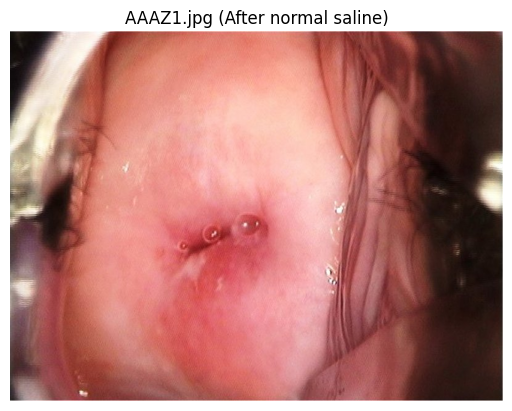

📸 AAAZ2.jpg — Type: After normal saline with green filter


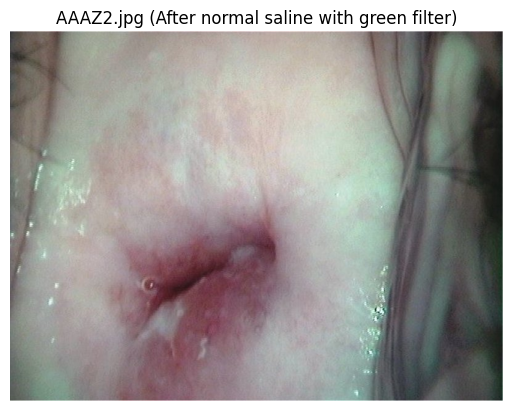

📸 AAAZ4.jpg — Type: After acetic acid


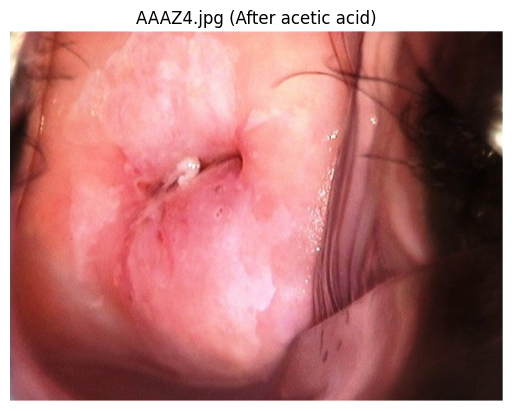

📸 AAAZ6.jpg — Type: After acetic acid with green filter


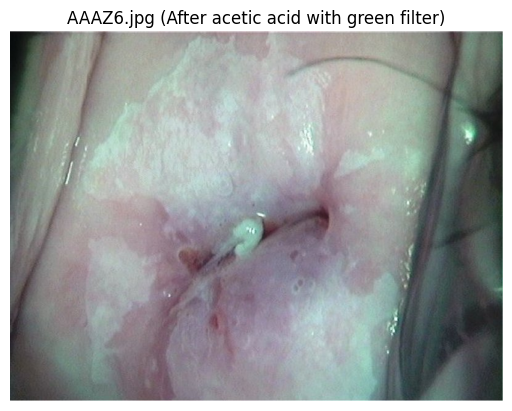

📸 AAAZ8.jpg — Type: After Lugol’s iodine


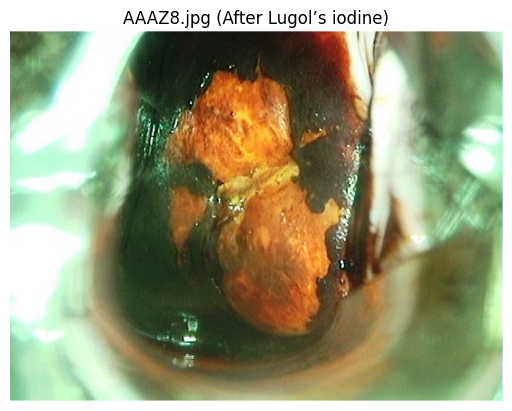

In [ ]:
display_case("Case 095")



📂 Searching in folder: Case 126
🔍 Detected Case ID from filename: AAAN

📑 Clinical Metadata:



,125
Case Number,126
CaseID,AAAN
HPV,Positive
Adequacy,Adequate
Reason,NaN
Squamocolumnar junction visibility,Not visible
Transformation zone,Type 3
Original squamous epithelium,Atrophic
Columnar epithelium,Ectopy absent
Metaplastic squamous epithelium,NaN



🖼️ Images and Types:

📸 AAAN0.jpg — Type: Speculum examination


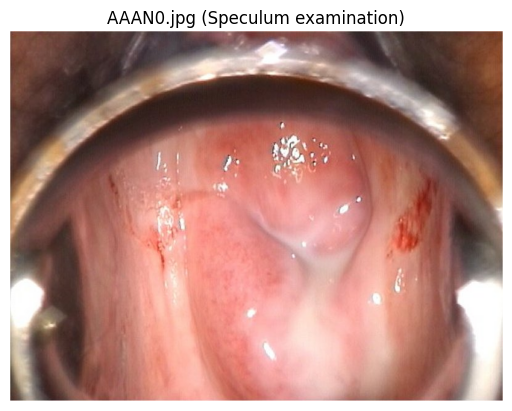

📸 AAAN2.jpg — Type: After normal saline


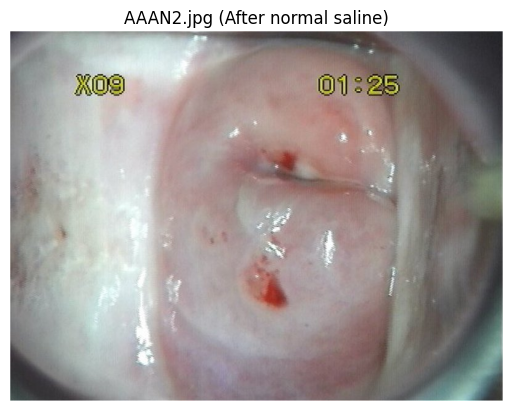

📸 AAAN3.jpg — Type: After acetic acid


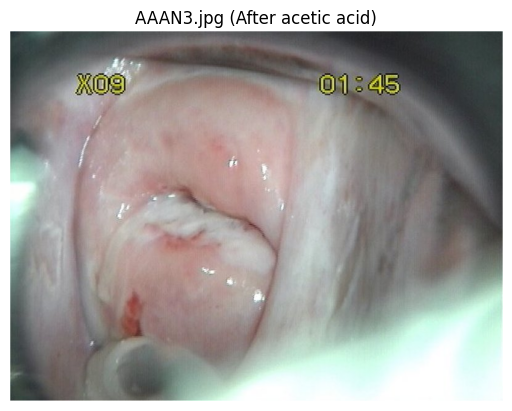

📸 AAAN6.jpg — Type: Examination with endocervical speculum


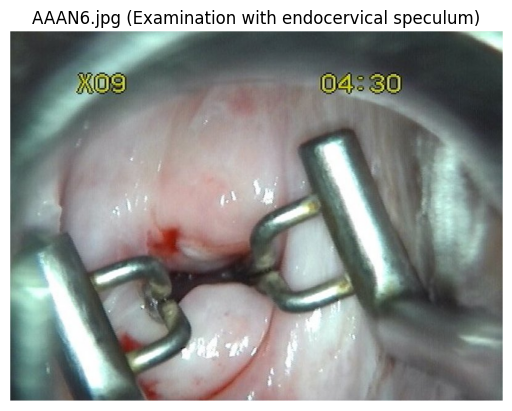

In [ ]:
display_case("Case 095")


In [ ]:
!pip install torchvision transformers --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 142.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 112.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 64.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 118.2 MB/s eta 0:00:00


In [ ]:
import os
from PIL import Image
import torch
from torchvision import transforms
from torchvision.models import vit_b_16
from tqdm import tqdm


In [ ]:
# ViT default preprocessing
vit_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
])


In [ ]:
def load_and_preprocess_images(case_folder_path):
    images = []
    filenames = []

    for img_name in sorted(os.listdir(case_folder_path)):
        if img_name.endswith('.jpg'):
            img_path = os.path.join(case_folder_path, img_name)
            img = Image.open(img_path).convert("RGB")
            img_tensor = vit_transform(img)
            images.append(img_tensor)
            filenames.append(img_name)

    if not images:
        print("⚠️ No images found in", case_folder_path)

    return torch.stack(images), filenames  # shape: [N, 3, 224, 224]


In [ ]:
case_path = "/content/drive/MyDrive/clinicalimages/Case 198"
images_tensor, image_names = load_and_preprocess_images(case_path)

print("Image tensor shape:", images_tensor.shape)  # [N, 3, 224, 224]


Image tensor shape: torch.Size([4, 3, 224, 224])


In [ ]:
images_tensor, image_names = load_and_preprocess_images(case_path)

print("Image tensor shape:", images_tensor.shape)  # [N, 3, 224, 224]
print("Image filenames:", image_names)


Image tensor shape: torch.Size([4, 3, 224, 224])
Image filenames: ['AAGU1.jpg', 'AAGU3.jpg', 'AAGU4.jpg', 'AAGU6.jpg']


In [ ]:
import torch
from torchvision.models import vit_b_16, ViT_B_16_Weights

# Step 1: Load Pretrained ViT model with default weights
weights = ViT_B_16_Weights.DEFAULT
vit_model = vit_b_16(weights=weights)
vit_model.eval()

# Step 2: Remove the final classification head to extract pure image features
vit_model.heads = torch.nn.Identity()

# Step 3: Move model and tensor to CUDA if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vit_model = vit_model.to(device)
images_tensor = images_tensor.to(device)

# Step 4: Extract image features (CLS token embedding, 768-dim)
with torch.no_grad():
    image_features = vit_model(images_tensor)  # shape: [batch_size, 768]

# Step 5: Print feature shape and preview
print("Extracted image features shape:", image_features.shape)
print("First image feature vector (first 5 dims):", image_features[0][:5])


Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:01<00:00, 278MB/s]


Extracted image features shape: torch.Size([4, 768])
First image feature vector (first 5 dims): tensor([-0.5004, -1.0864, -0.3798,  1.0430,  0.2421])


In [ ]:
!pip install timm


In [ ]:
import timm
import torch
from torchvision import transforms
from PIL import Image

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load ViT with CLS token support
vit_model = timm.create_model('vit_base_patch16_224', pretrained=True)
vit_model.eval().to(device)

# Preprocessing transform (same as before)
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5)),
])

# Load image
img_path = '/content/drive/MyDrive/clinicalimages/Case 001/AAAW1.jpg'
img = Image.open(img_path).convert('RGB')
img_tensor = transform(img).unsqueeze(0).to(device)  # Shape: [1, 3, 224, 224]

# Extract CLS embedding
with torch.no_grad():
    output = vit_model.forward_features(img_tensor)  # Shape: [1, 768]
    cls_embedding = output[:, 0, :]  # CLS token only

print("✅ CLS Embedding shape:", cls_embedding.shape)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

✅ CLS Embedding shape: torch.Size([1, 768])


In [ ]:
cls_embedding = vit_model(img_tensor)[:, 0]


In [ ]:
import os

embedding_dir = "/content/drive/MyDrive/clinicalimages/embeddings"
os.makedirs(embedding_dir, exist_ok=True)


In [ ]:
# Assuming `cls_embedding` is already extracted and of shape [1, 768]
torch.save(cls_embedding, f"{embedding_dir}/case001_cls_embedding.pt")


In [ ]:
loaded_embedding = torch.load(f"{embedding_dir}/case001_cls_embedding.pt")
print(loaded_embedding.shape)  # should be [1, 768]


torch.Size([1])


In [ ]:
torch.save(cls_embedding, "/content/drive/MyDrive/clinicalimages/embeddings/case001_cls_embedding.pt")


In [ ]:
with torch.no_grad():
    cls_embedding = vit_model.forward_features(img_tensor)
    print("✅ CLS Embedding shape:", cls_embedding.shape)  # should be [1, 768]

# Save it
torch.save(cls_embedding, "/content/drive/MyDrive/clinicalimages/embeddings/case001_cls_embedding.pt")

# Reload to verify
loaded_embedding = torch.load("/content/drive/MyDrive/clinicalimages/embeddings/case001_cls_embedding.pt")
print("✅ Loaded embedding shape:", loaded_embedding.shape)  # ✅ torch.Size([1, 768])


✅ CLS Embedding shape: torch.Size([1, 197, 768])
✅ Loaded embedding shape: torch.Size([1, 197, 768])


In [ ]:
# Extract [CLS] token from position 0
cls_token_embedding = cls_embedding[:, 0, :]  # shape: [1, 768]

# Save the CLS token embedding
torch.save(cls_token_embedding, "/content/drive/MyDrive/clinicalimages/embeddings/case001_cls_embedding.pt")

# Reload and verify
loaded_cls = torch.load("/content/drive/MyDrive/clinicalimages/embeddings/case001_cls_embedding.pt")
print("✅ Final CLS Token Shape:", loaded_cls.shape)  # should be [1, 768]


✅ Final CLS Token Shape: torch.Size([1, 768])


In [ ]:
from torchvision import models, transforms
from PIL import Image
import torch
import os

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from torchvision.models import vit_b_16, ViT_B_16_Weights

# Load Vision Transformer with proper weights argument (no warnings now)
weights = ViT_B_16_Weights.DEFAULT
vit_model = vit_b_16(weights=weights)
vit_model.eval().to(device)


VisionTransformer(
  (conv_proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
  (encoder): Encoder(
    (dropout): Dropout(p=0.0, inplace=False)
    (layers): Sequential(
      (encoder_layer_0): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_attention): MultiheadAttention(
          (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
        )
        (dropout): Dropout(p=0.0, inplace=False)
        (ln_2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): MLPBlock(
          (0): Linear(in_features=768, out_features=3072, bias=True)
          (1): GELU(approximate='none')
          (2): Dropout(p=0.0, inplace=False)
          (3): Linear(in_features=3072, out_features=768, bias=True)
          (4): Dropout(p=0.0, inplace=False)
        )
      )
      (encoder_layer_1): EncoderBlock(
        (ln_1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (self_a

In [ ]:
from torchvision.models import vit_b_16, ViT_B_16_Weights

# Load weights
weights = ViT_B_16_Weights.IMAGENET1K_V1

# Use official transform from the weights
transform = weights.transforms()

print("✅ ViT transform setup done.")


✅ ViT transform setup done.


In [ ]:
def get_cls_token_embedding(model, img_tensor):
    # Step 1: Patch + CLS embedding
    x = model._process_input(img_tensor)  # shape: [1, 196, 768]

    # Add CLS token + position embedding
    cls_token = model.encoder.cls_token.expand(img_tensor.shape[0], -1, -1)  # [1, 1, 768]
    x = torch.cat((cls_token, x), dim=1)  # [1, 197, 768]
    x = x + model.encoder.pos_embedding  # Add position embedding
    x = model.encoder.dropout(x)

    # Step 2: Transformer Encoder Layers
    for blk in model.encoder.layers:
        x = blk(x)

    # Step 3: Final LayerNorm
    x = model.encoder.ln(x)

    # Step 4: CLS token is first token
    cls_token_embedding = x[:, 0]  # shape: [1, 768]
    return cls_token_embedding


In [ ]:
def get_cls_token_embedding(model, img_tensor):
    # Step 1: Get the patch + cls input tokens
    x = model._process_input(img_tensor)  # shape: [1, 196, 768]

    # Step 2: Prepend the class token from model
    batch_size = x.shape[0]
    cls_token = model.cls_token.expand(batch_size, -1, -1)  # [1, 1, 768]
    x = torch.cat((cls_token, x), dim=1)  # [1, 197, 768]

    # Step 3: Add positional embeddings
    x = x + model.encoder.pos_embedding
    x = model.encoder.dropout(x)

    # Step 4: Pass through all transformer blocks
    for blk in model.encoder.layers:
        x = blk(x)

    # Step 5: Final layer norm
    x = model.encoder.ln(x)

    # Step 6: Extract CLS token embedding
    cls_token_embedding = x[:, 0]  # [1, 768]
    return cls_token_embedding


In [ ]:
import torch
from torchvision.models.vision_transformer import vit_b_16, ViT_B_16_Weights
from torchvision import transforms
from PIL import Image

# Load model + weights
weights = ViT_B_16_Weights.DEFAULT
model = vit_b_16(weights=weights)
model.eval()

# Image path
img_path = "/content/drive/MyDrive/clinicalimages/Case 001/AAAW1.jpg"

# Preprocessing
transform = weights.transforms()
img = Image.open(img_path).convert("RGB")
img_tensor = transform(img).unsqueeze(0)  # Shape: [1, 3, 224, 224]

# ✅ Extract CLS token using Torchvision ViT internals
def extract_cls_token(model, img_tensor):
    with torch.no_grad():
        x = model._process_input(img_tensor)  # Converts image into patches
        n, _, _ = x.shape

        # Manually create and add CLS token
        cls_token = torch.zeros(n, 1, model.hidden_dim, device=x.device)
        x = torch.cat([cls_token, x], dim=1)

        # Positional encoding
        x = x + model.encoder.pos_embedding[:, :x.shape[1], :]
        x = model.encoder.dropout(x)

        # Pass through Transformer encoder blocks
        for blk in model.encoder.layers:
            x = blk(x)

        x = model.encoder.ln(x)  # LayerNorm
        return x[:, 0]  # CLS token at index 0

# Run it
cls_token_embedding = extract_cls_token(model, img_tensor)
print("✅ Final CLS Token Shape:", cls_token_embedding.shape)


✅ Final CLS Token Shape: torch.Size([1, 768])


In [ ]:
# Save model only if you've made changes
torch.save(model.state_dict(), "/content/drive/MyDrive/clinicalimages/vit_model.pth")


In [ ]:
import numpy as np

# Suppose cls_token_embedding is shape [1, 768]
cls_array = cls_token_embedding.squeeze().cpu().numpy()  # Convert to 1D NumPy array

# Save it as .npy file
np.save('/content/drive/MyDrive/clinicalimages/sample_cls_token.npy', cls_array)


In [ ]:
cls_token_loaded = np.load('/content/drive/MyDrive/clinicalimages/sample_cls_token.npy')


In [ ]:
!pip install transformers


In [ ]:
from transformers import AutoTokenizer, AutoModel
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# ✅ Use Bio_ClinicalBERT
model_name = "emilyalsentzer/Bio_ClinicalBERT"
tokenizer = AutoTokenizer.from_pretrained(model_name)
clinical_model = AutoModel.from_pretrained(model_name).to(device)
clinical_model.eval()


config.json:   0%|          | 0.00/385 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/436M [00:00<?, ?B/s]

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(28996, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
import pandas as pd

# Load the metadata file (modify path if needed)
metadata_path = '/content/drive/MyDrive/clinicalimages/metadata.xlsx'
df = pd.read_excel(metadata_path)

# Show sample
df.head()


,Unnamed: 0,Unnamed: 1,Unnamed: 2,General assessment,Unnamed: 4,Unnamed: 5,Unnamed: 6,Normal colposcopic findings,Unnamed: 8,Unnamed: 9,...,Unnamed: 33,Swede score,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Case Summary,Unnamed: 41,Unnamed: 42
0,Case Number,CaseID,HPV,Adequacy,Reason,Squamocolumnar junction visibility,Transformation zone,Original squamous epithelium,Columnar epithelium,Metaplastic squamous epithelium,...,Additional miscellaneous finding,Aceto uptake,Margins,Vessels,Lesion size,Iodine uptake,SwedeFinal,\nProvisional diagnosis,Management,Histopathology
1,1,AAAW,Positive,Adequate,NaN,Completely visible,Type 1,Mature,Ectopy absent,Nabothian cysts,...,NaN,Nil or transparent,Nil or diffuse,"Fine, regular",< 5 mm,Faintly or patchy yellow,1,Type 1 transformation zone; normal,Repeat HPV test/colposcopy after 1 year,Not done
2,2,AADE,Negative,Adequate,NaN,Completely visible,Type 1,Mature,Ectopy present,Crypt (gland) openings,...,NaN,Nil or transparent,Nil or diffuse,"Fine, regular",< 5 mm,Brown,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
3,3,AADG,Negative,Adequate,NaN,Completely visible,Type 1,Mature,Ectopy absent,Crypt (gland) openings,...,NaN,Nil or transparent,Nil or diffuse,Absent,< 5 mm,Brown,1,Type 1 transformation zone; normal,Routine screening after 5 years,Not done
4,4,AAEG,Negative,Adequate,NaN,Completely visible,Type 1,Mature,Ectopy absent,NaN,...,NaN,Nil or transparent,Nil or diffuse,"Fine, regular",< 5 mm,Brown,0,Type 1 transformation zone; normal,Routine screening after 5 years,Not done


In [ ]:
import pandas as pd

# Use the actual names from Google Drive
imgtypes_path = "/content/drive/MyDrive/clinicalimages/imgtypes.xlsx"
metadata_path = "/content/drive/MyDrive/clinicalimages/metadata.xlsx"

# Load the spreadsheets
df_imgtypes = pd.read_excel(imgtypes_path)
df_metadata = pd.read_excel(metadata_path)

# Check the first few rows
print("🔍 Image Types Sheet:")
print(df_imgtypes.head())

print("\n🔍 Metadata Sheet:")
print(df_metadata.head())


🔍 Image Types Sheet:
   Case Number       File  Sort                                 Type
0            1  AAAW1.jpg     1                  After normal saline
1            1  AAAW3.jpg     2                    After acetic acid
2            1  AAAW2.jpg     3  After acetic acid with green filter
3            1  AAAW4.jpg     4                 After Lugol’s iodine
4            2  AADE0.jpg     1                    After acetic acid

🔍 Metadata Sheet:
    Unnamed: 0 Unnamed: 1 Unnamed: 2 General assessment Unnamed: 4  \
0  Case Number     CaseID        HPV           Adequacy     Reason   
1            1       AAAW   Positive           Adequate        NaN   
2            2       AADE   Negative           Adequate        NaN   
3            3       AADG   Negative           Adequate        NaN   
4            4       AAEG   Negative           Adequate        NaN   

                           Unnamed: 5           Unnamed: 6  \
0  Squamocolumnar junction visibility  Transformation zone   
1

In [ ]:
import pandas as pd



# ✅ Read Excel files
df_imgtypes = pd.read_excel(imgtypes_path)
df_metadata = pd.read_excel(metadata_path)

# ✅ Strip any trailing spaces from column names
df_imgtypes.columns = df_imgtypes.columns.str.strip()
df_metadata.columns = df_metadata.columns.str.strip()

# ✅ Show columns to confirm
print("🔍 Columns in df_imgtypes:", df_imgtypes.columns.tolist())
print("🔍 Columns in df_metadata:", df_metadata.columns.tolist())

# ✅ Show sample data
print("\n📸 Sample from df_imgtypes:")
print(df_imgtypes.head())

print("\n🧬 Sample from df_metadata:")
print(df_metadata.head())


🔍 Columns in df_imgtypes: ['Case Number', 'File', 'Sort', 'Type']
🔍 Columns in df_metadata: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2', 'General assessment', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Normal colposcopic findings', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Abnormal colposcopic findings / General principles / Position and size', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Grade 1 (minor)', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Grade 2 (major)', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Non-specific', 'Unnamed: 28', 'Suspicious for invasion', 'Unnamed: 30', 'Unnamed: 31', 'Miscellaneous finding', 'Unnamed: 33', 'Swede score', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Case Summary', 'Unnamed: 41', 'Unnamed: 42']

📸 Sample from df_imgtypes:
   Case Number       File  Sort                                 Type
0            1  AAAW1.jpg     1                  After norm

In [ ]:
# Remove leading/trailing whitespaces in column names
df_imgtypes.columns = df_imgtypes.columns.str.strip()
df_metadata.columns = df_metadata.columns.str.strip()


In [ ]:
print("📸 Sample from df_imgtypes:")
print(df_imgtypes.head())

print("\n🧬 Sample from df_metadata:")
print(df_metadata.head())


📸 Sample from df_imgtypes:
   Case Number       File  Sort                                 Type
0            1  AAAW1.jpg     1                  After normal saline
1            1  AAAW3.jpg     2                    After acetic acid
2            1  AAAW2.jpg     3  After acetic acid with green filter
3            1  AAAW4.jpg     4                 After Lugol’s iodine
4            2  AADE0.jpg     1                    After acetic acid

🧬 Sample from df_metadata:
    Unnamed: 0 Unnamed: 1 Unnamed: 2 General assessment Unnamed: 4  \
0  Case Number     CaseID        HPV           Adequacy     Reason   
1            1       AAAW   Positive           Adequate        NaN   
2            2       AADE   Negative           Adequate        NaN   
3            3       AADG   Negative           Adequate        NaN   
4            4       AAEG   Negative           Adequate        NaN   

                           Unnamed: 5           Unnamed: 6  \
0  Squamocolumnar junction visibility  Transform

In [ ]:
import os
from PIL import Image
from torchvision import models, transforms
import torch

# Set path to your Drive-mounted dataset
case_id = 'Case 001'
case_path = os.path.join('/content/drive/MyDrive/clinicalimages', case_id)

# Image preprocessing for ViT
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))  # Normalize to [-1, 1]
])

# Load ViT model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vit_model = models.vit_b_16(pretrained=True)
vit_model.eval()
vit_model.to(device)

# Remove classification head to extract only CLS token embedding
vit_model.heads = torch.nn.Identity()

# List image files in the case folder
image_files = [f for f in os.listdir(case_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]

cls_embeddings = {}

for img_file in image_files:
    try:
        img_path = os.path.join(case_path, img_file)
        image = Image.open(img_path).convert("RGB")
        input_tensor = transform(image).unsqueeze(0).to(device)

        with torch.no_grad():
            output = vit_model(input_tensor)
            cls_embeddings[img_file] = output.squeeze().cpu().numpy()

        print(f"✅ Extracted CLS embedding for {img_file} → Shape: {output.shape}")

    except Exception as e:
        print(f"❌ Error loading {img_file}: {e}")

print(f"\nTotal images processed for {case_id}: {len(cls_embeddings)}")


✅ Extracted CLS embedding for AAAW3.jpg → Shape: torch.Size([1, 768])
✅ Extracted CLS embedding for AAAW2.jpg → Shape: torch.Size([1, 768])
✅ Extracted CLS embedding for AAAW4.jpg → Shape: torch.Size([1, 768])
✅ Extracted CLS embedding for AAAW1.jpg → Shape: torch.Size([1, 768])

Total images processed for Case 001: 4


In [ ]:
import os
from PIL import Image
from torchvision import models, transforms
import torch
import numpy as np
from tqdm import tqdm

# --- 1. Set Up Paths ---
root_path = '/content/drive/MyDrive/clinicalimages'

# --- 2. Preprocessing for ViT ---
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
])

# --- 3. Load Pretrained ViT Model ---
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
vit_model = models.vit_b_16(pretrained=True)
vit_model.heads = torch.nn.Identity()  # remove classifier head to get [CLS]
vit_model.eval().to(device)

# --- 4. Process All Cases ---
all_case_embeddings = {}

for case_num in tqdm(range(1, 201), desc="Processing Cases"):
    case_id = f"Case {case_num:03d}"
    case_path = os.path.join(root_path, case_id)

    if not os.path.exists(case_path):
        print(f"⚠️ Skipping: {case_id} not found.")
        continue

    image_files = [f for f in os.listdir(case_path) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    if len(image_files) == 0:
        print(f"⚠️ Skipping: {case_id} has no valid images.")
        continue

    case_embeddings = {}

    for img_file in image_files:
        try:
            img_path = os.path.join(case_path, img_file)
            image = Image.open(img_path).convert("RGB")
            input_tensor = transform(image).unsqueeze(0).to(device)

            with torch.no_grad():
                cls_embedding = vit_model(input_tensor)
                case_embeddings[img_file] = cls_embedding.squeeze().cpu().numpy()

        except Exception as e:
            print(f"❌ Error in {case_id} - {img_file}: {e}")

    all_case_embeddings[case_id] = case_embeddings
    print(f"✅ {case_id} done → {len(case_embeddings)} images")

# --- 5. Save All Embeddings ---
np.save('/content/vit_all_case_embeddings.npy', all_case_embeddings)
print("\n✅ All cases processed. Embeddings saved as 'vit_all_case_embeddings.npy'")


Processing Cases:   0%|          | 1/200 [00:02<07:57,  2.40s/it]

✅ Case 001 done → 4 images


Processing Cases:   1%|          | 2/200 [00:06<10:32,  3.19s/it]

✅ Case 002 done → 4 images


Processing Cases:   2%|▏         | 3/200 [00:10<11:31,  3.51s/it]

✅ Case 003 done → 4 images


Processing Cases:   2%|▏         | 4/200 [00:12<10:43,  3.28s/it]

✅ Case 004 done → 3 images


Processing Cases:   2%|▎         | 5/200 [00:16<11:21,  3.49s/it]

✅ Case 005 done → 4 images


Processing Cases:   3%|▎         | 6/200 [00:21<12:43,  3.94s/it]

✅ Case 006 done → 5 images


Processing Cases:   4%|▎         | 7/200 [00:25<12:41,  3.94s/it]

✅ Case 007 done → 4 images


Processing Cases:   4%|▍         | 8/200 [00:29<12:24,  3.88s/it]

✅ Case 008 done → 4 images


Processing Cases:   4%|▍         | 9/200 [00:35<14:57,  4.70s/it]

✅ Case 009 done → 7 images


Processing Cases:   5%|▌         | 10/200 [00:41<15:26,  4.88s/it]

✅ Case 010 done → 4 images


Processing Cases:   6%|▌         | 11/200 [00:45<14:27,  4.59s/it]

✅ Case 011 done → 4 images


Processing Cases:   6%|▌         | 12/200 [00:47<12:40,  4.04s/it]

✅ Case 012 done → 3 images


Processing Cases:   6%|▋         | 13/200 [00:52<13:01,  4.18s/it]

✅ Case 013 done → 5 images


Processing Cases:   7%|▋         | 14/200 [00:57<13:30,  4.36s/it]

✅ Case 014 done → 5 images


Processing Cases:   8%|▊         | 15/200 [01:01<13:24,  4.35s/it]

✅ Case 015 done → 3 images


Processing Cases:   8%|▊         | 16/200 [01:06<13:45,  4.49s/it]

✅ Case 016 done → 4 images


Processing Cases:   8%|▊         | 17/200 [01:13<16:34,  5.43s/it]

✅ Case 017 done → 5 images


Processing Cases:   9%|▉         | 18/200 [01:17<14:48,  4.88s/it]

✅ Case 018 done → 4 images


Processing Cases:  10%|▉         | 19/200 [01:23<15:41,  5.20s/it]

✅ Case 019 done → 6 images


Processing Cases:  10%|█         | 20/200 [01:27<14:20,  4.78s/it]

✅ Case 020 done → 4 images


Processing Cases:  10%|█         | 21/200 [01:31<13:46,  4.62s/it]

✅ Case 021 done → 4 images


Processing Cases:  11%|█         | 22/200 [01:36<13:58,  4.71s/it]

✅ Case 022 done → 5 images


Processing Cases:  12%|█▏        | 23/200 [01:40<13:08,  4.45s/it]

✅ Case 023 done → 4 images


Processing Cases:  12%|█▏        | 24/200 [01:44<12:37,  4.31s/it]

✅ Case 024 done → 4 images


Processing Cases:  12%|█▎        | 25/200 [01:49<13:16,  4.55s/it]

✅ Case 025 done → 5 images


Processing Cases:  13%|█▎        | 26/200 [01:52<11:58,  4.13s/it]

✅ Case 026 done → 3 images


Processing Cases:  14%|█▎        | 27/200 [01:58<13:55,  4.83s/it]

✅ Case 027 done → 7 images


Processing Cases:  14%|█▍        | 28/200 [02:03<13:40,  4.77s/it]

✅ Case 028 done → 5 images


Processing Cases:  14%|█▍        | 29/200 [02:09<14:24,  5.06s/it]

✅ Case 029 done → 6 images


Processing Cases:  15%|█▌        | 30/200 [02:12<13:07,  4.63s/it]

✅ Case 030 done → 4 images


Processing Cases:  16%|█▌        | 31/200 [02:20<15:36,  5.54s/it]

✅ Case 031 done → 6 images


Processing Cases:  16%|█▌        | 32/200 [02:24<14:33,  5.20s/it]

✅ Case 032 done → 5 images


Processing Cases:  16%|█▋        | 33/200 [02:30<14:52,  5.34s/it]

✅ Case 033 done → 6 images


Processing Cases:  17%|█▋        | 34/200 [02:36<15:04,  5.45s/it]

✅ Case 034 done → 4 images


Processing Cases:  18%|█▊        | 35/200 [02:39<13:21,  4.86s/it]

✅ Case 035 done → 3 images


Processing Cases:  18%|█▊        | 36/200 [02:44<13:27,  4.93s/it]

✅ Case 036 done → 5 images


Processing Cases:  18%|█▊        | 37/200 [02:49<12:56,  4.76s/it]

✅ Case 037 done → 5 images


Processing Cases:  19%|█▉        | 38/200 [02:52<11:21,  4.21s/it]

✅ Case 038 done → 3 images


Processing Cases:  20%|█▉        | 39/200 [02:55<10:20,  3.86s/it]

✅ Case 039 done → 3 images


Processing Cases:  20%|██        | 40/200 [02:58<10:00,  3.75s/it]

✅ Case 040 done → 4 images


Processing Cases:  20%|██        | 41/200 [03:04<11:24,  4.30s/it]

✅ Case 041 done → 6 images


Processing Cases:  21%|██        | 42/200 [03:07<10:39,  4.05s/it]

✅ Case 042 done → 4 images


Processing Cases:  22%|██▏       | 43/200 [03:12<11:15,  4.30s/it]

✅ Case 043 done → 6 images


Processing Cases:  22%|██▏       | 44/200 [03:16<11:02,  4.25s/it]

✅ Case 044 done → 4 images


Processing Cases:  22%|██▎       | 45/200 [03:20<10:40,  4.13s/it]

✅ Case 045 done → 4 images


Processing Cases:  23%|██▎       | 46/200 [03:26<11:48,  4.60s/it]

✅ Case 046 done → 4 images


Processing Cases:  24%|██▎       | 47/200 [03:29<10:55,  4.29s/it]

✅ Case 047 done → 4 images


Processing Cases:  24%|██▍       | 48/200 [03:34<11:02,  4.36s/it]

✅ Case 048 done → 5 images


Processing Cases:  24%|██▍       | 49/200 [03:38<10:35,  4.21s/it]

✅ Case 049 done → 4 images


Processing Cases:  25%|██▌       | 50/200 [03:41<09:50,  3.93s/it]

✅ Case 050 done → 3 images


Processing Cases:  26%|██▌       | 51/200 [03:45<09:29,  3.82s/it]

✅ Case 051 done → 4 images


Processing Cases:  26%|██▌       | 52/200 [03:48<08:41,  3.52s/it]

✅ Case 052 done → 3 images
⚠️ Skipping: Case 053 not found.


Processing Cases:  27%|██▋       | 54/200 [03:51<06:46,  2.78s/it]

✅ Case 054 done → 4 images


Processing Cases:  28%|██▊       | 55/200 [03:55<07:24,  3.07s/it]

✅ Case 055 done → 4 images


Processing Cases:  28%|██▊       | 56/200 [03:59<07:59,  3.33s/it]

✅ Case 056 done → 4 images


Processing Cases:  28%|██▊       | 57/200 [04:05<09:31,  4.00s/it]

✅ Case 057 done → 4 images


Processing Cases:  29%|██▉       | 58/200 [04:12<11:09,  4.71s/it]

✅ Case 058 done → 5 images


Processing Cases:  30%|██▉       | 59/200 [04:15<09:48,  4.18s/it]

✅ Case 059 done → 3 images


Processing Cases:  30%|███       | 60/200 [04:19<10:04,  4.32s/it]

✅ Case 060 done → 5 images


Processing Cases:  30%|███       | 61/200 [04:22<09:16,  4.01s/it]

✅ Case 061 done → 3 images


Processing Cases:  31%|███       | 62/200 [04:27<09:47,  4.26s/it]

✅ Case 062 done → 5 images


Processing Cases:  32%|███▏      | 63/200 [04:30<08:47,  3.85s/it]

✅ Case 063 done → 3 images


Processing Cases:  32%|███▏      | 64/200 [04:36<09:57,  4.40s/it]

✅ Case 064 done → 6 images


Processing Cases:  32%|███▎      | 65/200 [04:40<09:28,  4.21s/it]

✅ Case 065 done → 4 images


Processing Cases:  33%|███▎      | 66/200 [04:43<08:58,  4.02s/it]

✅ Case 066 done → 4 images


Processing Cases:  34%|███▎      | 67/200 [04:48<09:34,  4.32s/it]

✅ Case 067 done → 5 images


Processing Cases:  34%|███▍      | 68/200 [04:52<09:24,  4.27s/it]

✅ Case 068 done → 4 images


Processing Cases:  34%|███▍      | 69/200 [04:56<08:36,  3.94s/it]

✅ Case 069 done → 3 images


Processing Cases:  35%|███▌      | 70/200 [04:59<08:02,  3.71s/it]

✅ Case 070 done → 3 images


Processing Cases:  36%|███▌      | 71/200 [05:02<07:54,  3.68s/it]

✅ Case 071 done → 4 images


Processing Cases:  36%|███▌      | 72/200 [05:05<07:12,  3.38s/it]

✅ Case 072 done → 3 images


Processing Cases:  36%|███▋      | 73/200 [05:11<08:31,  4.03s/it]

✅ Case 073 done → 6 images


Processing Cases:  37%|███▋      | 74/200 [05:14<08:06,  3.86s/it]

✅ Case 074 done → 4 images


Processing Cases:  38%|███▊      | 75/200 [05:19<08:38,  4.15s/it]

✅ Case 075 done → 5 images


Processing Cases:  38%|███▊      | 76/200 [05:23<08:20,  4.04s/it]

✅ Case 076 done → 4 images


Processing Cases:  38%|███▊      | 77/200 [05:26<07:34,  3.70s/it]

✅ Case 077 done → 3 images


Processing Cases:  39%|███▉      | 78/200 [05:30<07:57,  3.91s/it]

✅ Case 078 done → 5 images


Processing Cases:  40%|███▉      | 79/200 [05:35<08:26,  4.19s/it]

✅ Case 079 done → 5 images


Processing Cases:  40%|████      | 80/200 [05:39<08:36,  4.30s/it]

✅ Case 080 done → 5 images


Processing Cases:  40%|████      | 81/200 [05:42<07:32,  3.80s/it]

✅ Case 081 done → 3 images


Processing Cases:  41%|████      | 82/200 [05:46<07:30,  3.82s/it]

✅ Case 082 done → 4 images


Processing Cases:  42%|████▏     | 83/200 [05:48<06:45,  3.47s/it]

✅ Case 083 done → 3 images


Processing Cases:  42%|████▏     | 84/200 [05:53<07:18,  3.78s/it]

✅ Case 084 done → 5 images


Processing Cases:  42%|████▎     | 85/200 [05:58<07:48,  4.08s/it]

✅ Case 085 done → 5 images


Processing Cases:  43%|████▎     | 86/200 [06:01<07:29,  3.94s/it]

✅ Case 086 done → 4 images


Processing Cases:  44%|████▎     | 87/200 [06:06<07:55,  4.21s/it]

✅ Case 087 done → 4 images


Processing Cases:  44%|████▍     | 88/200 [06:10<07:49,  4.19s/it]

✅ Case 088 done → 4 images


Processing Cases:  44%|████▍     | 89/200 [06:17<09:04,  4.90s/it]

✅ Case 089 done → 6 images


Processing Cases:  45%|████▌     | 90/200 [06:22<09:05,  4.95s/it]

✅ Case 090 done → 5 images


Processing Cases:  46%|████▌     | 91/200 [06:26<08:24,  4.63s/it]

✅ Case 091 done → 4 images


Processing Cases:  46%|████▌     | 92/200 [06:32<08:58,  4.98s/it]

✅ Case 092 done → 5 images


Processing Cases:  46%|████▋     | 93/200 [06:37<08:58,  5.03s/it]

✅ Case 093 done → 6 images


Processing Cases:  47%|████▋     | 94/200 [06:40<07:42,  4.36s/it]

✅ Case 094 done → 3 images


Processing Cases:  48%|████▊     | 95/200 [06:42<06:42,  3.83s/it]

✅ Case 095 done → 5 images


Processing Cases:  48%|████▊     | 96/200 [06:47<06:56,  4.00s/it]

✅ Case 096 done → 5 images


Processing Cases:  48%|████▊     | 97/200 [06:50<06:37,  3.86s/it]

✅ Case 097 done → 4 images


Processing Cases:  49%|████▉     | 98/200 [06:54<06:32,  3.85s/it]

✅ Case 098 done → 4 images


Processing Cases:  50%|████▉     | 99/200 [06:59<07:03,  4.19s/it]

✅ Case 099 done → 5 images


Processing Cases:  50%|█████     | 100/200 [07:02<06:14,  3.74s/it]

✅ Case 100 done → 3 images


Processing Cases:  50%|█████     | 101/200 [07:07<06:43,  4.07s/it]

✅ Case 101 done → 5 images


Processing Cases:  51%|█████     | 102/200 [07:10<06:21,  3.90s/it]

✅ Case 102 done → 4 images


Processing Cases:  52%|█████▏    | 103/200 [07:15<06:57,  4.30s/it]

✅ Case 103 done → 4 images


Processing Cases:  52%|█████▏    | 104/200 [07:20<07:01,  4.40s/it]

✅ Case 104 done → 4 images


Processing Cases:  52%|█████▎    | 105/200 [07:23<06:29,  4.10s/it]

✅ Case 105 done → 4 images


Processing Cases:  53%|█████▎    | 106/200 [07:30<07:35,  4.84s/it]

✅ Case 106 done → 7 images


Processing Cases:  54%|█████▎    | 107/200 [07:34<07:15,  4.68s/it]

✅ Case 107 done → 5 images


Processing Cases:  54%|█████▍    | 108/200 [07:39<07:01,  4.58s/it]

✅ Case 108 done → 5 images


Processing Cases:  55%|█████▍    | 109/200 [07:43<07:05,  4.67s/it]

✅ Case 109 done → 5 images


Processing Cases:  55%|█████▌    | 110/200 [07:47<06:34,  4.39s/it]

✅ Case 110 done → 4 images


Processing Cases:  56%|█████▌    | 111/200 [07:54<07:49,  5.28s/it]

✅ Case 111 done → 8 images


Processing Cases:  56%|█████▌    | 112/200 [07:57<06:36,  4.51s/it]

✅ Case 112 done → 3 images


Processing Cases:  56%|█████▋    | 113/200 [08:02<06:30,  4.49s/it]

✅ Case 113 done → 5 images


Processing Cases:  57%|█████▋    | 114/200 [08:06<06:25,  4.48s/it]

✅ Case 114 done → 4 images


Processing Cases:  57%|█████▊    | 115/200 [08:11<06:39,  4.70s/it]

✅ Case 115 done → 5 images


Processing Cases:  58%|█████▊    | 116/200 [08:17<06:48,  4.86s/it]

✅ Case 116 done → 5 images


Processing Cases:  58%|█████▊    | 117/200 [08:23<07:12,  5.21s/it]

✅ Case 117 done → 6 images


Processing Cases:  59%|█████▉    | 118/200 [08:28<07:05,  5.19s/it]

✅ Case 118 done → 5 images


Processing Cases:  60%|█████▉    | 119/200 [08:33<06:58,  5.17s/it]

✅ Case 119 done → 6 images


Processing Cases:  60%|██████    | 120/200 [08:40<07:49,  5.87s/it]

✅ Case 120 done → 8 images


Processing Cases:  60%|██████    | 121/200 [08:44<06:47,  5.16s/it]

✅ Case 121 done → 4 images


Processing Cases:  61%|██████    | 122/200 [08:48<06:08,  4.72s/it]

✅ Case 122 done → 3 images


Processing Cases:  62%|██████▏   | 123/200 [08:52<06:06,  4.76s/it]

✅ Case 123 done → 5 images


Processing Cases:  62%|██████▏   | 124/200 [08:57<05:58,  4.71s/it]

✅ Case 124 done → 5 images


Processing Cases:  62%|██████▎   | 125/200 [09:01<05:29,  4.39s/it]

✅ Case 125 done → 4 images


Processing Cases:  63%|██████▎   | 126/200 [09:04<05:12,  4.22s/it]

✅ Case 126 done → 4 images


Processing Cases:  64%|██████▎   | 127/200 [09:08<04:54,  4.03s/it]

✅ Case 127 done → 4 images


Processing Cases:  64%|██████▍   | 128/200 [09:11<04:21,  3.63s/it]

✅ Case 128 done → 3 images


Processing Cases:  64%|██████▍   | 129/200 [09:16<04:58,  4.21s/it]

✅ Case 129 done → 6 images


Processing Cases:  65%|██████▌   | 130/200 [09:22<05:23,  4.62s/it]

✅ Case 130 done → 6 images


Processing Cases:  66%|██████▌   | 131/200 [09:27<05:21,  4.66s/it]

✅ Case 131 done → 5 images


Processing Cases:  66%|██████▌   | 132/200 [09:30<04:53,  4.32s/it]

✅ Case 132 done → 4 images


Processing Cases:  66%|██████▋   | 133/200 [09:34<04:32,  4.07s/it]

✅ Case 133 done → 4 images


Processing Cases:  67%|██████▋   | 134/200 [09:38<04:38,  4.21s/it]

✅ Case 134 done → 5 images


Processing Cases:  68%|██████▊   | 135/200 [09:42<04:19,  3.99s/it]

✅ Case 135 done → 4 images


Processing Cases:  68%|██████▊   | 136/200 [09:46<04:25,  4.15s/it]

✅ Case 136 done → 5 images


Processing Cases:  68%|██████▊   | 137/200 [09:54<05:29,  5.23s/it]

✅ Case 137 done → 8 images


Processing Cases:  69%|██████▉   | 138/200 [10:07<07:58,  7.71s/it]

✅ Case 138 done → 9 images


Processing Cases:  70%|██████▉   | 139/200 [10:13<07:12,  7.09s/it]

✅ Case 139 done → 6 images


Processing Cases:  70%|███████   | 140/200 [10:17<06:12,  6.20s/it]

✅ Case 140 done → 5 images


Processing Cases:  70%|███████   | 141/200 [10:21<05:18,  5.40s/it]

✅ Case 141 done → 4 images


Processing Cases:  71%|███████   | 142/200 [10:26<05:06,  5.29s/it]

✅ Case 142 done → 5 images


Processing Cases:  72%|███████▏  | 143/200 [10:29<04:21,  4.59s/it]

✅ Case 143 done → 3 images


Processing Cases:  72%|███████▏  | 144/200 [10:34<04:32,  4.87s/it]

✅ Case 144 done → 6 images


Processing Cases:  72%|███████▎  | 145/200 [10:40<04:50,  5.29s/it]

✅ Case 145 done → 7 images


Processing Cases:  73%|███████▎  | 146/200 [10:45<04:31,  5.02s/it]

✅ Case 146 done → 5 images


Processing Cases:  74%|███████▎  | 147/200 [10:48<03:49,  4.33s/it]

✅ Case 147 done → 3 images


Processing Cases:  74%|███████▍  | 148/200 [10:52<03:51,  4.46s/it]

✅ Case 148 done → 5 images


Processing Cases:  74%|███████▍  | 149/200 [10:57<03:46,  4.45s/it]

✅ Case 149 done → 5 images


Processing Cases:  75%|███████▌  | 150/200 [11:01<03:43,  4.47s/it]

✅ Case 150 done → 5 images


Processing Cases:  76%|███████▌  | 151/200 [11:04<03:12,  3.93s/it]

✅ Case 151 done → 3 images


Processing Cases:  76%|███████▌  | 152/200 [11:09<03:29,  4.37s/it]

✅ Case 152 done → 5 images


Processing Cases:  76%|███████▋  | 153/200 [11:14<03:30,  4.49s/it]

✅ Case 153 done → 5 images


Processing Cases:  77%|███████▋  | 154/200 [11:19<03:30,  4.57s/it]

✅ Case 154 done → 4 images


Processing Cases:  78%|███████▊  | 155/200 [11:25<03:47,  5.04s/it]

✅ Case 155 done → 5 images


Processing Cases:  78%|███████▊  | 156/200 [11:29<03:24,  4.64s/it]

✅ Case 156 done → 4 images


Processing Cases:  78%|███████▊  | 157/200 [11:33<03:11,  4.45s/it]

✅ Case 157 done → 4 images


Processing Cases:  79%|███████▉  | 158/200 [11:36<02:56,  4.21s/it]

✅ Case 158 done → 4 images


Processing Cases:  80%|███████▉  | 159/200 [11:45<03:50,  5.63s/it]

✅ Case 159 done → 5 images


Processing Cases:  80%|████████  | 160/200 [11:50<03:32,  5.31s/it]

✅ Case 160 done → 5 images


Processing Cases:  80%|████████  | 161/200 [12:06<05:37,  8.66s/it]

✅ Case 161 done → 4 images


Processing Cases:  81%|████████  | 162/200 [12:10<04:32,  7.16s/it]

✅ Case 162 done → 4 images


Processing Cases:  82%|████████▏ | 163/200 [12:16<04:06,  6.67s/it]

✅ Case 163 done → 6 images


Processing Cases:  82%|████████▏ | 164/200 [12:19<03:29,  5.83s/it]

✅ Case 164 done → 4 images


Processing Cases:  82%|████████▎ | 165/200 [12:23<03:02,  5.21s/it]

✅ Case 165 done → 4 images


Processing Cases:  83%|████████▎ | 166/200 [12:28<02:49,  4.98s/it]

✅ Case 166 done → 5 images


Processing Cases:  84%|████████▎ | 167/200 [12:32<02:41,  4.89s/it]

✅ Case 167 done → 5 images


Processing Cases:  84%|████████▍ | 168/200 [12:36<02:24,  4.53s/it]

✅ Case 168 done → 4 images


Processing Cases:  84%|████████▍ | 169/200 [12:39<02:04,  4.03s/it]

✅ Case 169 done → 3 images


Processing Cases:  85%|████████▌ | 170/200 [12:43<02:00,  4.02s/it]

✅ Case 170 done → 3 images


Processing Cases:  86%|████████▌ | 171/200 [12:47<01:59,  4.14s/it]

✅ Case 171 done → 5 images


Processing Cases:  86%|████████▌ | 172/200 [12:54<02:14,  4.81s/it]

✅ Case 172 done → 6 images


Processing Cases:  86%|████████▋ | 173/200 [12:58<02:07,  4.73s/it]

✅ Case 173 done → 5 images


Processing Cases:  87%|████████▋ | 174/200 [13:03<02:03,  4.74s/it]

✅ Case 174 done → 5 images


Processing Cases:  88%|████████▊ | 175/200 [13:09<02:10,  5.20s/it]

✅ Case 175 done → 6 images


Processing Cases:  88%|████████▊ | 176/200 [13:13<01:53,  4.72s/it]

✅ Case 176 done → 4 images


Processing Cases:  88%|████████▊ | 177/200 [13:19<01:58,  5.13s/it]

✅ Case 177 done → 6 images


Processing Cases:  89%|████████▉ | 178/200 [13:22<01:36,  4.40s/it]

✅ Case 178 done → 3 images


Processing Cases:  90%|████████▉ | 179/200 [13:27<01:38,  4.70s/it]

✅ Case 179 done → 6 images


Processing Cases:  90%|█████████ | 180/200 [13:32<01:32,  4.63s/it]

✅ Case 180 done → 5 images


Processing Cases:  90%|█████████ | 181/200 [13:37<01:31,  4.82s/it]

✅ Case 181 done → 6 images


Processing Cases:  91%|█████████ | 182/200 [13:44<01:40,  5.57s/it]

✅ Case 182 done → 8 images


Processing Cases:  92%|█████████▏| 183/200 [13:48<01:26,  5.07s/it]

✅ Case 183 done → 4 images


Processing Cases:  92%|█████████▏| 184/200 [13:56<01:36,  6.00s/it]

✅ Case 184 done → 8 images


Processing Cases:  92%|█████████▎| 185/200 [14:00<01:18,  5.27s/it]

✅ Case 185 done → 4 images


Processing Cases:  93%|█████████▎| 186/200 [14:03<01:06,  4.76s/it]

✅ Case 186 done → 3 images


Processing Cases:  94%|█████████▎| 187/200 [14:08<00:59,  4.60s/it]

✅ Case 187 done → 5 images


Processing Cases:  94%|█████████▍| 188/200 [14:11<00:52,  4.37s/it]

✅ Case 188 done → 4 images


Processing Cases:  94%|█████████▍| 189/200 [14:15<00:46,  4.20s/it]

✅ Case 189 done → 4 images


Processing Cases:  95%|█████████▌| 190/200 [14:18<00:37,  3.77s/it]

✅ Case 190 done → 3 images


Processing Cases:  96%|█████████▌| 191/200 [14:21<00:31,  3.47s/it]

✅ Case 191 done → 3 images


Processing Cases:  96%|█████████▌| 192/200 [14:24<00:28,  3.56s/it]

✅ Case 192 done → 4 images


Processing Cases:  96%|█████████▋| 193/200 [14:28<00:25,  3.61s/it]

✅ Case 193 done → 4 images


Processing Cases:  97%|█████████▋| 194/200 [14:33<00:23,  3.85s/it]

✅ Case 194 done → 5 images


Processing Cases:  98%|█████████▊| 195/200 [14:39<00:23,  4.61s/it]

✅ Case 195 done → 7 images


Processing Cases:  98%|█████████▊| 196/200 [14:43<00:18,  4.56s/it]

✅ Case 196 done → 5 images


Processing Cases:  98%|█████████▊| 197/200 [14:49<00:14,  4.86s/it]

✅ Case 197 done → 5 images


Processing Cases:  99%|█████████▉| 198/200 [14:51<00:07,  3.97s/it]

✅ Case 198 done → 4 images


Processing Cases: 100%|█████████▉| 199/200 [14:55<00:03,  3.89s/it]

✅ Case 199 done → 4 images


Processing Cases: 100%|██████████| 200/200 [14:59<00:00,  4.50s/it]

✅ Case 200 done → 5 images

✅ All cases processed. Embeddings saved as 'vit_all_case_embeddings.npy'


In [ ]:
np.save("/content/vit_all_case_embeddings.npy", all_case_embeddings)


In [ ]:
import shutil
shutil.copy("/content/vit_all_case_embeddings.npy", "/content/drive/MyDrive/clinicalimages/vit_all_case_embeddings1.npy")


'/content/drive/MyDrive/clinicalimages/vit_all_case_embeddings1.npy'

In [ ]:
loaded_embeddings = np.load("/content/drive/MyDrive/clinicalimages/vit_all_case_embeddings1.npy", allow_pickle=True).item()


In [ ]:
!pip install segmentation-models-pytorch==0.3.2
!pip install torch torchvision


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 549.1/549.1 kB 29.7 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16426 sha256=ce3eea929f2aaa28d5eca39d825830ba413cce92a55188ad38db844ea89d29c7
  Stored in directory: /root/.cache/pip/wheels/8b/6f/9b/231a832f811ab6ebb1b32455b177ffc6b8b1cd8de19de70c09
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=7b9f4bdc01da40811b1d35e04827de76b07fccbbb6d2a900f79508b9df27d27d
  Stored in directory: /root/.cache/pip/wheels/5f/5b/96/fd94bc35962d7c6b699e8814db545155ac91d2b95785e1b035
Successfully built efficientnet-pytorch pretrainedmodels
  Attempting uninstall: timm
    Found existing installati